# 1. Importing necessary libraries

In [15]:
#basic libraries

import numpy as np
import pandas as pd

#visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Read the dataset

In [16]:
df = pd.read_csv("./heart_disease_uci.csv", index_col = 'id')

# 3. Find out Data Types and Column Types

In [48]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0,0,0
2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3,1,2
3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2,2,1
4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0,1,0
5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,1,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 1 to 749
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    int64  
 1   sex       299 non-null    int64  
 2   dataset   299 non-null    int64  
 3   cp        299 non-null    int64  
 4   trestbps  299 non-null    float64
 5   chol      299 non-null    float64
 6   fbs       299 non-null    int64  
 7   restecg   299 non-null    int64  
 8   thalch    299 non-null    float64
 9   exang     299 non-null    int64  
 10  oldpeak   299 non-null    float64
 11  slope     299 non-null    int64  
 12  ca        299 non-null    int64  
 13  thal      299 non-null    int64  
 14  num       299 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 37.4 KB


In [22]:
list_col = df.columns
values_col = []
for colIndex, col in enumerate(list_col): 
    if (len(df[col].unique()) > 10): values_col = '{} {}'.format(len(df[col].unique()), 'values')
    else: values_col = df[col].unique()
    print('{}. {}: {}'.format(colIndex + 1, col, values_col))

1. age: 50 values
2. sex: ['Male' 'Female']
3. dataset: ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
4. cp: ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
5. trestbps: 62 values
6. chol: 218 values
7. fbs: [True False nan]
8. restecg: ['lv hypertrophy' 'normal' 'st-t abnormality' nan]
9. thalch: 120 values
10. exang: [False True nan]
11. oldpeak: 54 values
12. slope: ['downsloping' 'flat' 'upsloping' nan]
13. ca: [ 0.  3.  2.  1. nan]
14. thal: ['fixed defect' 'normal' 'reversable defect' nan]
15. num: [0 2 1 3 4]


# 4. Data Cleaning

## Checking data characters mistakes

In [34]:
df['thal'].replace(['reversable defect'], 'reversible defect', inplace = True)

## Checking for missing values and replace them

In [28]:
df['fbs'] = df['fbs'].fillna('NA')
df = df.drop(df[df['fbs'] == 'NA'].index)

In [29]:
df['restecg'] = df['restecg'].fillna('NA')
df = df.drop(df[df['restecg'] == 'NA'].index)

In [30]:
df['exang'] = df['exang'].fillna('NA')
df = df.drop(df[df['exang'] == 'NA'].index)

In [31]:
df['slope'] = df['slope'].fillna('NA')
df = df.drop(df[df['slope'] == 'NA'].index)

In [32]:
df['ca'] = df['ca'].fillna('NA')
df = df.drop(df[df['ca'] == 'NA'].index)

In [33]:
df['thal'] = df['thal'].fillna('NA')
df = df.drop(df[df['thal'] == 'NA'].index)

## Checking for duplicate rows

## Statistics Summary

In [35]:
# Summary Statistics for Numerical data:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,54.521739,131.715719,246.785953,149.327759,1.058528,0.946488
std,9.030264,17.747751,52.532582,23.121062,1.162769,1.230409
min,29.000000,94.000000,100.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,132.500000,0.000000,0.000000
50%,56.000000,130.000000,242.000000,152.000000,0.800000,0.000000
75%,61.000000,140.000000,275.500000,165.500000,1.600000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000


In [36]:
# Summary Statistics for Categorical data:
df.describe(exclude=[np.number])

,sex,dataset,cp,fbs,restecg,exang,slope,ca,thal
count,299,299,299,299,299,299,299,299.0,299
unique,2,3,4,2,3,2,3,4.0,3
top,Male,Cleveland,asymptomatic,False,normal,False,flat,0.0,normal
freq,203,297,144,256,149,200,139,176.0,164


In [37]:
df.isnull().sum() 

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

## Outliers and how to remove them

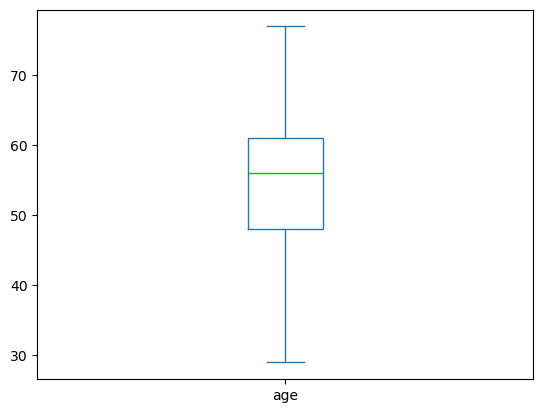

In [38]:
df['age'].plot(kind='box')
plt.show()

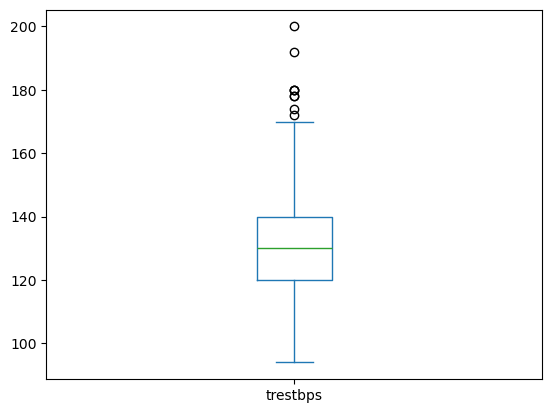

In [39]:
df['trestbps'].plot(kind='box')
plt.show()

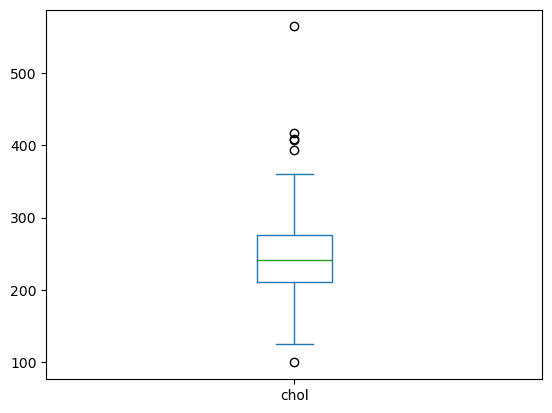

In [40]:
df['chol'].plot(kind='box')
plt.show()

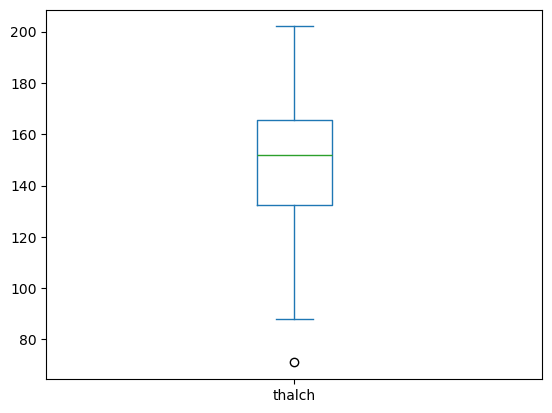

In [41]:
df['thalch'].plot(kind='box')
plt.show()

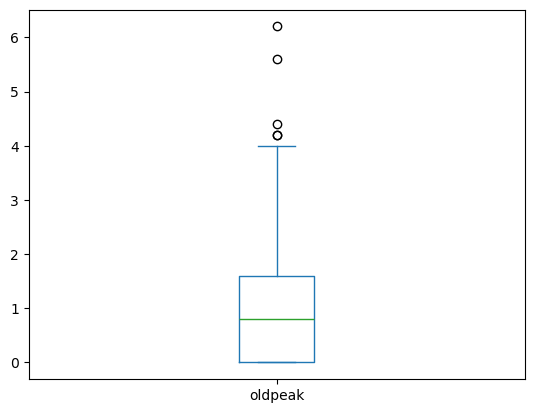

In [42]:
df['oldpeak'].plot(kind='box')
plt.show()

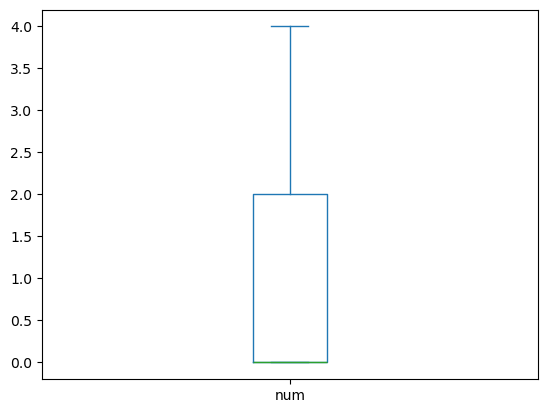

In [43]:
df['num'].plot(kind='box')
plt.show()

# 5. Distributions and Relationships

## Categorical Variable Distribution

## Relationship between categorical and continues variables

# 6. Data Anslysis and Visualization

## Age variable distribution

## Gender distribution accoding to target variable

## Chest pain distribution according to target variables

## Draw correlation using Pearson's Heat-map

In [44]:
from sklearn.preprocessing import LabelEncoder
object_cols = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

<Axes: >

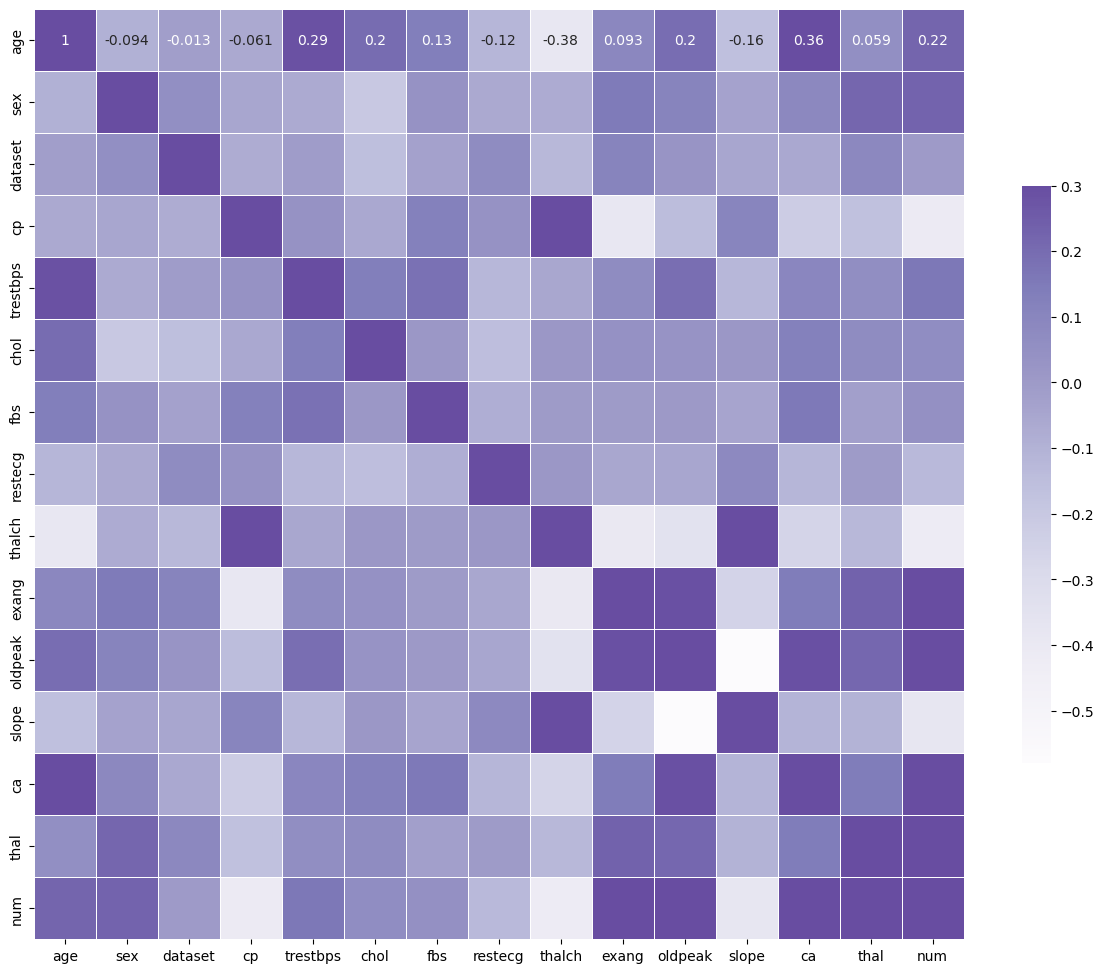

In [45]:
# Compute the correlation matrix
corr = df.corr()

f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='Purples', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

/var/folders/9r/wnc9gnyj61n5rkt3c6yzg16c0000gn/T/ipykernel_15761/3980166100.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], ax=axes[0,0])
/Users/jnova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/9r/wnc9gnyj61n5rkt3c6yzg16c0000gn/T/ipykernel_15761/3980166100.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot`

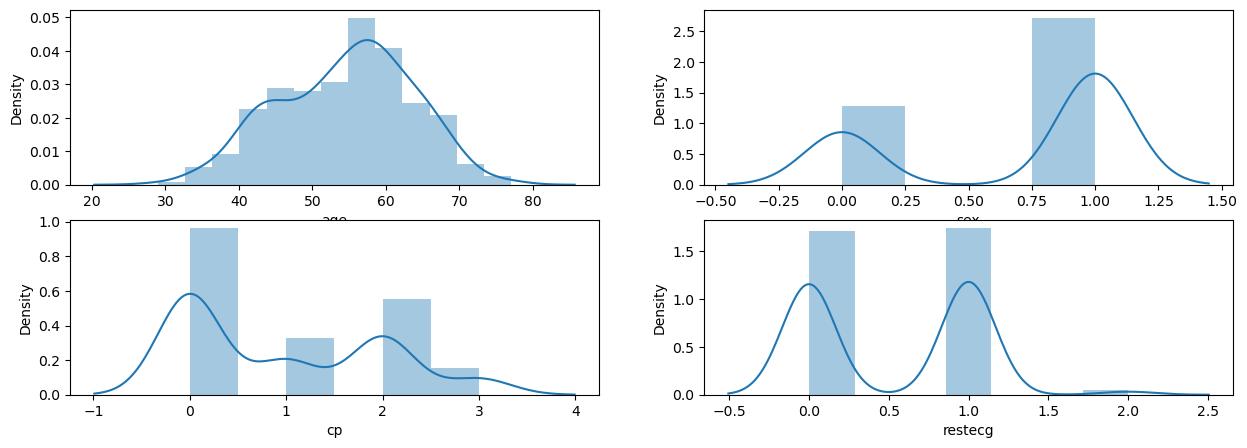

In [46]:
fig, axes = plt.subplots(2,2, figsize=(15,5))

sns.distplot(df['age'], ax=axes[0,0])
sns.distplot(df['sex'], ax=axes[0,1])
sns.distplot(df['cp'], ax=axes[1,0])
sns.distplot(df['restecg'], ax=axes[1,1])


plt.show()

/var/folders/9r/wnc9gnyj61n5rkt3c6yzg16c0000gn/T/ipykernel_15761/3469822856.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ca'], ax=axes[0,0])
/Users/jnova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


KeyError: 'slop'

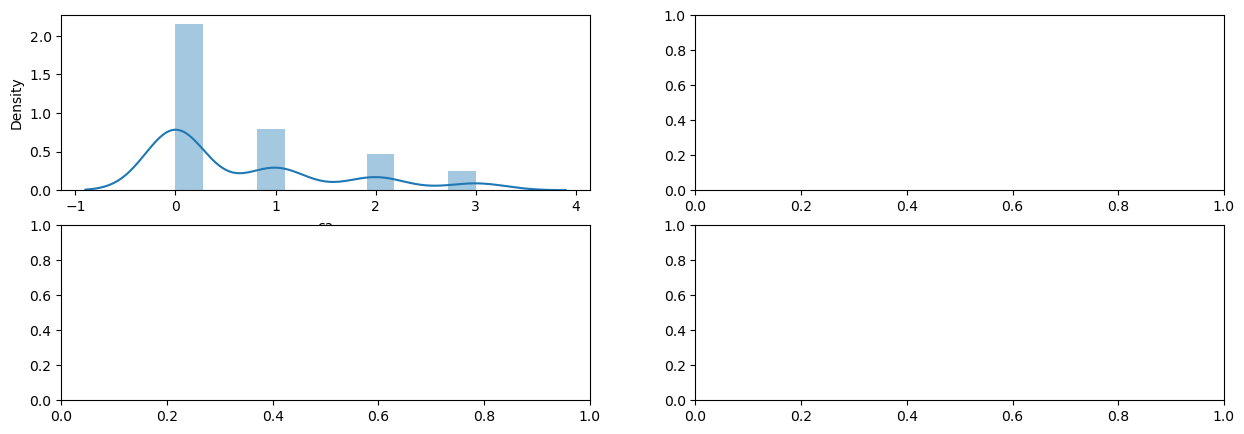

In [47]:
# Categorical variable distributions

fig, axes = plt.subplots(2,2, figsize=(15,5))

sns.distplot(df['ca'], ax=axes[0,0])
sns.distplot(df['slop'], ax=axes[0,1])
sns.distplot(df['fbs'], ax=axes[1,0])
sns.distplot(df['restecg'], ax=axes[1,1])


plt.show()

# 7. Conclusions

1) Which ML model you would choose for this taks?

- I would choose linear regression because the model prediction depend of multiple features data 

2) Write the equation for that model

- x = m*b

3) Explain the equation written in the previous question and explain all the terms in the dataset (Independent, Dependent, Features, Weights)

- The dependent variable is m it is the slope, the b is the linear value and x is the value of x axis